In [68]:

import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

%matplotlib inline


world_map = gpd.read_file('../data/raw/world_map_lo_res.geo.json')

world_map.head()

,featurecla,scalerank,labelrank,sovereignt,sov_a3,adm0_dif,level,type,tlc,admin,...,fclass_id,fclass_pl,fclass_gr,fclass_it,fclass_nl,fclass_se,fclass_bd,fclass_ua,filename,geometry
0,Admin-0 country,1,5,Costa Rica,CRI,0,2,Sovereign country,1,Costa Rica,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CRI.geojson,"POLYGON ((-82.54620 9.56613, -82.93289 9.47681..."
1,Admin-0 country,1,5,Nicaragua,NIC,0,2,Sovereign country,1,Nicaragua,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NIC.geojson,"POLYGON ((-83.65561 10.93876, -83.89505 10.726..."
2,Admin-0 country,1,5,Haiti,HTI,0,2,Sovereign country,1,Haiti,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HTI.geojson,"POLYGON ((-71.71236 19.71446, -71.62487 19.169..."
3,Admin-0 country,1,5,Dominican Republic,DOM,0,2,Sovereign country,1,Dominican Republic,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DOM.geojson,"POLYGON ((-71.70830 18.04500, -71.68774 18.316..."
4,Admin-0 country,1,6,El Salvador,SLV,0,2,Sovereign country,1,El Salvador,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SLV.geojson,"POLYGON ((-89.35333 14.42413, -89.05851 14.340..."


<Axes: >

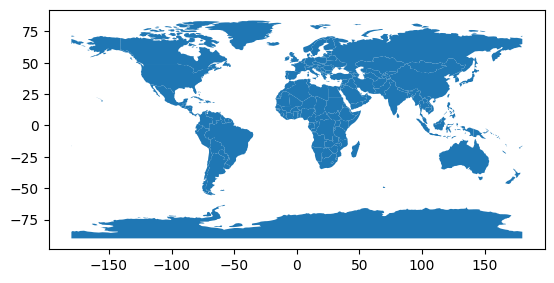

In [69]:
#Clean data

world_map = world_map[['sovereignt','filename','geometry']]
world_map = world_map.rename(columns={'sovereignt':'country'})

world_map['country_lower'] = world_map['country'].str.lower()

world_map.head()
world_map.plot()



Get continents

In [70]:
# Read continents 

continents = pd.read_csv('../data/raw/WID_countries.csv', delimiter=";")
continents = continents[['shortname', 'region','region2']]
continents.rename(columns={'shortname':'country', 'region':'continent', 'region2':'region'}, inplace=True)
continents['country_lower'] = continents.country.str.lower()

continents.head()

,country,continent,region,country_lower
0,Andorra,Europe,Western Europe,andorra
1,United Arab Emirates,Asia,West Asia,united arab emirates
2,Afghanistan,Asia,South Asia,afghanistan
3,Antigua and Barbuda,Americas,Caribbean,antigua and barbuda
4,Anguilla,Americas,Caribbean,anguilla


In [71]:
#Save Continents to processed data

continents.to_csv('../data/processed/continents.csv')

In [72]:
world_map_with_continents = pd.merge(world_map, continents, on='country_lower')


print("Length of world map before joining with continents ", len(world_map))
print("Length of world map after joining with continents", len(world_map_with_continents))

world_map[~world_map['country'].isin(continents['country'])]['country']




Length of world map before joining with continents  177
Length of world map after joining with continents 160


8              United States of America
14                          The Bahamas
16             United States of America
26                                Syria
27                          South Korea
35                              Vietnam
41                                 Laos
51                           East Timor
52                               Brunei
60                      Northern Cyprus
83          United Republic of Tanzania
84                           Somaliland
87                Republic of the Congo
88     Democratic Republic of the Congo
101                         Ivory Coast
112                            eSwatini
133                              Russia
134                             Czechia
159                  Republic of Serbia
175                          Antarctica
Name: country, dtype: object

In [73]:
world_map[world_map.country=='United States of America']['country']

8     United States of America
16    United States of America
Name: country, dtype: object

In [27]:
world_map_with_continents.head()

,featurecla,scalerank,labelrank,country_x,sov_a3,adm0_dif,level,type,tlc,admin,...,fclass_nl,fclass_se,fclass_bd,fclass_ua,filename,geometry,country_lower,country_y,continent_y,region
0,Admin-0 country,1,5,Costa Rica,CRI,0,2,Sovereign country,1,Costa Rica,...,NaN,NaN,NaN,NaN,CRI.geojson,"POLYGON ((-82.54620 9.56613, -82.93289 9.47681...",costa rica,Costa Rica,Americas,Central America
1,Admin-0 country,1,5,Nicaragua,NIC,0,2,Sovereign country,1,Nicaragua,...,NaN,NaN,NaN,NaN,NIC.geojson,"POLYGON ((-83.65561 10.93876, -83.89505 10.726...",nicaragua,Nicaragua,Americas,Central America
2,Admin-0 country,1,5,Haiti,HTI,0,2,Sovereign country,1,Haiti,...,NaN,NaN,NaN,NaN,HTI.geojson,"POLYGON ((-71.71236 19.71446, -71.62487 19.169...",haiti,Haiti,Americas,Caribbean
3,Admin-0 country,1,5,Dominican Republic,DOM,0,2,Sovereign country,1,Dominican Republic,...,NaN,NaN,NaN,NaN,DOM.geojson,"POLYGON ((-71.70830 18.04500, -71.68774 18.316...",dominican republic,Dominican Republic,Americas,Caribbean
4,Admin-0 country,1,6,El Salvador,SLV,0,2,Sovereign country,1,El Salvador,...,NaN,NaN,NaN,NaN,SLV.geojson,"POLYGON ((-89.35333 14.42413, -89.05851 14.340...",el salvador,El Salvador,Americas,Central America


In [74]:
world_map_with_continents.to_csv('../data/processed/world_map_with_continents.csv')